## Importing Modules

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy
import math
import pylab as rcParams
import statsmodels.api as sm
from matplotlib.pyplot import figure
from statsmodels.graphics.gofplots import ProbPlot
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
from sklearn import metrics
from sklearn import preprocessing
from sklearn import linear_model
from statsmodels.formula.api import ols
from statsmodels.tools import add_constant

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
choice = pd.read_csv("E:/Data Science/DataCamp/Building Response Model R/mychoice.csv",sep=",")

## Customer purchases

The business with the hops is highly competitive. The main competitor of Hoppiness is the nation-wide offered brand Bud. Developing an effective marketing strategy requires the analysis of Hoppiness purchases in comparison to Bud.

The data sheet named choice.data is already loaded for you. You can use the function display the structure and the first few observations of sales.data.

In [3]:
choice.head()

,OBS,HOUSEHOLDID,LASTPURCHASE,BUD,HOPPINESS,PRICE.BUD,PRICE.HOP,DISPL.BUD,DISPL.HOP,FEAT.BUD,FEAT.HOP,FEATDISPL.BUD,FEATDISPL.HOP
0,1,1,0,1,0,0.052,0.034,0,0,0,0,0,0
1,2,1,0,1,0,0.052,0.044,0,0,0,0,0,0
2,3,1,0,1,0,0.046,0.048,0,0,1,0,0,0
3,4,1,0,1,0,0.052,0.034,0,0,0,0,0,0
4,5,1,0,1,0,0.046,0.048,0,0,1,0,0,0


In [4]:
choice.dtypes

OBS                int64
HOUSEHOLDID        int64
LASTPURCHASE       int64
BUD                int64
HOPPINESS          int64
PRICE.BUD        float64
PRICE.HOP        float64
DISPL.BUD          int64
DISPL.HOP          int64
FEAT.BUD           int64
FEAT.HOP           int64
FEATDISPL.BUD      int64
FEATDISPL.HOP      int64
dtype: object

## Summarizing the data

You start by summarizing the purchases and prices for HOPPINESS and BUD. You calculate the mean of the purchases as well as the average PRICE.HOP and PRICE.BUD levels by using the function colMeans(). The function colMeans() calculates the means across all specified columns simultaneously.

In [5]:
choice.describe()

,OBS,HOUSEHOLDID,LASTPURCHASE,BUD,HOPPINESS,PRICE.BUD,PRICE.HOP,DISPL.BUD,DISPL.HOP,FEAT.BUD,FEAT.HOP,FEATDISPL.BUD,FEATDISPL.HOP
count,2798.000000,2798.000000,2798.000000,2798.000000,2798.000000,2798.000000,2798.000000,2798.000000,2798.000000,2798.000000,2798.000000,2798.000000,2798.000000
mean,1399.500000,150.077555,0.107219,0.899929,0.100071,0.034828,0.033555,0.159757,0.035382,0.124732,0.036455,0.037527,0.009292
std,807.857351,86.322793,0.309447,0.300149,0.300149,0.008974,0.005307,0.366446,0.184777,0.330474,0.187452,0.190083,0.095965
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.001000,0.003000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,700.250000,77.000000,0.000000,1.000000,0.000000,0.030000,0.031000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1399.500000,154.000000,0.000000,1.000000,0.000000,0.034000,0.034000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2098.750000,224.000000,0.000000,1.000000,0.000000,0.042000,0.036000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2798.000000,300.000000,1.000000,1.000000,1.000000,0.061000,0.087000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## A linear probability model for beer demand

To see how much of an effect changes in price have on the purchases of Hoppiness, you display the relationship HOPPINESS ~ PRICE.HOP by using the function plot()

Again, you assume the relationship between HOPPINESS and PRICE.HOP to be linear by using the function lm(). You add the model predictions resulting from the model coefficients directly to the graph by using the function regplot().

In [9]:
X = choice[["PRICE.HOP"]]
y = choice[["HOPPINESS"]]
ProbabilityModel = LinearRegression().fit(X,y)
print('Coefficients: \n',ProbabilityModel.coef_)
print('Intercept: \n', ProbabilityModel.intercept_)

Coefficients: 
 [[-16.20277471]]
Intercept: 
 [ 0.64375043]


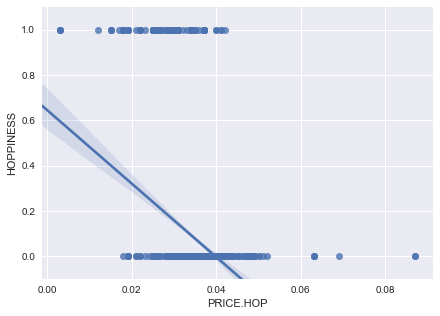

In [6]:
# Plot outputs
plt.figure(figsize=(7,5))
sns.plt.ylim(-0.1, 1.1)
sns.regplot(data=choice,
           x='PRICE.HOP',
           y='HOPPINESS')
plt.show()

## Competition

Developing an effective pricing strategy for Hoppiness also requires considering the prices for Bud. The best way to consider Bud in your model is by price comparisons. You define a new variable price.ratio indicating the ratio of PRICE.HOP to PRICE.BUD. To ensure symmetry thus, to ensure that the price ratio of Hoppiness to Bud has the same magnitude as the price ratio of Bud to Hoppiness, you additionally take the log().

To investigate the effects of changes in the price ratio on the purchase probabilities, you display the relation HOPPINESS ~ price.ratio by using the function plot(). The relation is again described by using the function lm(). The corresponding model predictions are added to the graph by using the function regplot().

In [11]:
price_ratio = np.log(choice["PRICE.HOP"]/choice["PRICE.BUD"])

In [12]:
price_ratio.head(5)

0   -0.424883
1   -0.167054
2    0.042560
3   -0.424883
4    0.042560
dtype: float64

In [13]:
choice["P_Ratio"] = price_ratio

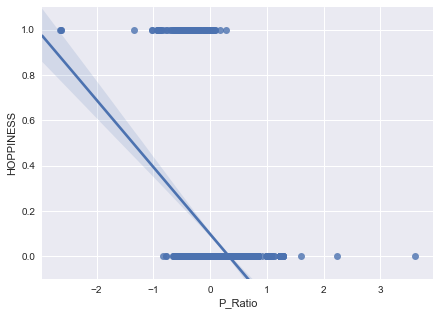

In [14]:
# Plot outputs
plt.figure(figsize=(7,5))
sns.plt.ylim(-0.1, 1.1)
sns.regplot(data=choice,
           x='P_Ratio',
           y='HOPPINESS')
plt.show()

## A logistic model for beer demand

The linear model does not fit the data when it comes to predicting purchase probabilities. This time, you use the function GLM() to describe the relation HOPPINESS ~ price.ratio

As HOPPINESS is a binary variable, you also have to specify the family argument as binomial. As usual, the estimated coefficients are obtained by using the function coef()

In [15]:
clf = LogisticRegression(random_state=0, solver='lbfgs',
                             multi_class='multinomial').fit(choice[["P_Ratio"]], choice[["HOPPINESS"]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
logistic_model = sm.MNLogit(choice["HOPPINESS"],choice["P_Ratio"])
logitMod = logistic_model.fit()
print(logitMod.summary())

Optimization terminated successfully.
         Current function value: 0.673635
         Iterations 5
                          MNLogit Regression Results                          
Dep. Variable:              HOPPINESS   No. Observations:                 2798
Model:                        MNLogit   Df Residuals:                     2797
Method:                           MLE   Df Model:                            0
Date:                Fri, 01 Feb 2019   Pseudo R-squ.:                  -1.071
Time:                        09:26:29   Log-Likelihood:                -1884.8
converged:                       True   LL-Null:                       -910.02
                                        LLR p-value:                       nan
HOPPINESS=1       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
P_Ratio        -1.1640      0.117     -9.927      0.000      -1.394      -0.934


In [20]:
mdl_margeff = logitMod.get_margeff()
print(mdl_margeff.summary())

       MNLogit Marginal Effects      
Dep. Variable:              HOPPINESS
Method:                          dydx
At:                           overall
HOPPINESS=0      dy/dx    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
P_Ratio         0.2800      0.026     10.668      0.000       0.229       0.331
-------------------------------------------------------------------------------
HOPPINESS=1      dy/dx    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
P_Ratio        -0.2800      0.026    -10.668      0.000      -0.331      -0.229


In [23]:
glm_binom = sm.GLM(choice["HOPPINESS"], choice[["P_Ratio"]], family=sm.families.Binomial())
glmfit = glm_binom.fit()
print(glmfit.summary())
print(glmfit.aic)
print(glmfit.bic)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              HOPPINESS   No. Observations:                 2798
Model:                            GLM   Df Residuals:                     2797
Model Family:                Binomial   Df Model:                            0
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -1884.8
Date:                Fri, 01 Feb 2019   Deviance:                       3769.7
Time:                        09:36:12   Pearson chi2:                 2.78e+03
No. Iterations:                     4                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
P_Ratio       -1.1640      0.117     -9.927      0.000      -1.394      -0.934
3771.65932801
-18429.1791262


In [18]:
print(clf.coef_)
print(clf.intercept_)

[[-3.1313977]]
[-1.71479244]


## Predictive performance

The glm() function is used because you need a response function that bounds the model predictions between zero and one. This effect is best illustrated in a graph.

Again, you display the relation HOPPINESS ~ price.ratio by using the function plot(). You obtain the model predictions by using the function fitted() on the logistic.model object. To add the corresponding logistic function to the graph you need to fit a curve (not a straight line) through the predicted data values.

Therefore, you first sort the predicted values together with the price.ratio values in decreasing order by using the function order(). Afterwards you join the sorted data points sequentially by using the function lines().

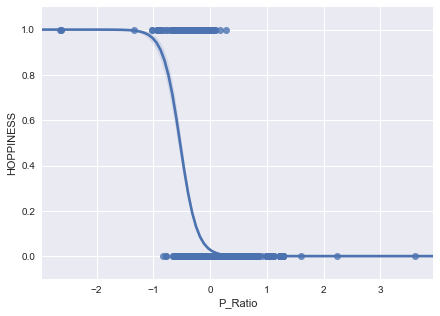

In [63]:
# Plot outputs
plt.figure(figsize=(7,5))
sns.plt.ylim(-0.1, 1.1)
sns.regplot(data=choice,
           x='P_Ratio',
           y='HOPPINESS',
           logistic=True)
plt.show()

## Average marginal effects

The logistic response function is essentially nonlinear. Therefore, it is not immediately clear what is the effect of a unit change in the price ratio on the probability that a customer purchases Hoppiness. A solution is to interpret the effect of a unit change averaged over all customers.

This average marginal effect can be derived by using the function margins(). The function is loaded from the add-on package margins. Finally, you will compare the average marginal effect for price.ratio of the logistic.model to the price.ratio coefficient of the probability.model.

In [62]:
from statsmodels.discrete.discrete_model import Logit

logit = Logit(choice[["HOPPINESS"]],choice[["P_Ratio"]])
res = logit.fit(method='bfgs')
# marginal effects at the mean
me = res.get_margeff(at='mean').summary()

Optimization terminated successfully.
         Current function value: 0.673635
         Iterations: 5
         Function evaluations: 7
         Gradient evaluations: 7


## Effects plots

One way to better understand the marginal effect of a unit change in price ratio is to use the logistic response model with some typical values and graph the predictions.

You can do this by using the function cplot() from the margins package. The function cplot() takes on the logistic.model object, the name of the predictor variable and the corresponding typical values as arguments. You assume the typical values for price.ratio to be in the range from -1 to 1. 

You define a sequence of numbers ranging from-1to1and having increments of 0.10 by using the function seq()`.

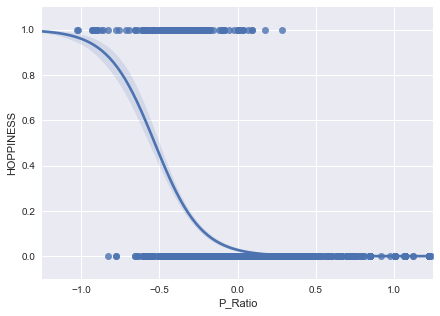

In [21]:
# Plot outputs
plt.figure(figsize=(7,5))
sns.plt.ylim(-0.1, 1.1)
sns.plt.xlim(-1.25, 1.25)
sns.regplot(data=choice,
           x='P_Ratio',
           y='HOPPINESS',
           logistic=True)
plt.show()

## Extending the logistic response model

Remember, the brewery installed point-of-sales displays to increase Hoppiness purchases. To stand out as a brand, the brewery additionally featured Hoppiness by highlighting it's regional character. These featuring activities had also been combined with point-of-sales displays.

You start with summarizing the DISPL.HOP, FEAT.HOP and FEATDISPL.HOP actions by using the function summary().

Next, you explain the purchase probabilities for HOPPINESS by price.ratio, DISPL.HOP, FEAT.HOP and FEATDISPL.HOP. Again, you use the function glm() and the family argument binomial.

Finally, you calculate the marginals effects of the predictors by using the function margins().

In [31]:
X_ex = choice[["HOPPINESS"]]
y_ex = choice[["P_Ratio","DISPL.HOP","FEAT.HOP","FEATDISPL.HOP"]]
extended_model = sm.GLM(X_ex, y_ex, family=sm.families.Binomial())
extendfit = extended_model.fit()
print(extendfit.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              HOPPINESS   No. Observations:                 2798
Model:                            GLM   Df Residuals:                     2794
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -1832.5
Date:                Fri, 01 Feb 2019   Deviance:                       3664.9
Time:                        09:49:17   Pearson chi2:                 2.75e+03
No. Iterations:                     5                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
P_Ratio          -1.3068      0.125    -10.465      0.000      -1.552      -1.062
DISPL.HOP        -1.2786      0.223     -5.

In [32]:
print(extendfit.aic)
print(extendfit.bic)

3672.90979455
-18510.1186792


In [33]:
null_model = sm.GLM(X_ex,y_ex, family=sm.families.NegativeBinomial())
nullfit = null_model.fit()
print(nullfit.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              HOPPINESS   No. Observations:                 2798
Model:                            GLM   Df Residuals:                     2794
Model Family:        NegativeBinomial   Df Model:                            3
Link Function:                    log   Scale:                  0.463273325162
Method:                          IRLS   Log-Likelihood:                -2054.5
Date:                Fri, 01 Feb 2019   Deviance:                       3332.8
Time:                        09:49:20   Pearson chi2:                 1.29e+03
No. Iterations:                    14                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
P_Ratio          -0.5399      0.054    -10.008      0.000      -0.646      -0.434
DISPL.HOP        -1.3767      0.142     -9.

In [37]:
print(extendfit.null_deviance) 
print(extendfit.deviance)
print(nullfit.null_deviance) 
print(nullfit.deviance)

1820.04305012
3664.90979455
1099.8521468
3332.77140246


In [39]:
model_fitted_y = extendfit.fittedvalues

## Classifications

The management of the brewery cannot really deal with "purchase probabilities". They want to have a model that predicts purchases. One way to solve this issue is to classify the predicted probabilities into predicted purchase events for Hoppiness.

Again, you obtain the predicted purchase probabilities by using the function fitted() on the extended.model object. You naively classify the predictions into 1, if the predicted purchase probability exceeds 0.5, and 0 otherwise. 

The function ifelse() allows you to do this. Afterwards, you summarize the classified purchase events by using the functions table() and mean().

In [49]:
a = []
b = []

for i in (model_fitted_y):
    
    if i < 0.5:
        a.append(i)
    else:
        b.append(i)

In [62]:
print(len(a))
print(len(b))

1223
1575


## Model confusion

On demand, you built a naive classifier. The brewery's management wants to work with these figures to adjust their marketing plan. So, is your classification really correct?

By cross-tabulating the observed vs. the classified purchase events you can check the performance of your classifier. Cross-tabulation can be done by using the function table() on the predicted purchase events together with the true observed purchases. 

To obtain the more convenient proportions you additionally divide the table by the total number of observations. Alternatively, you can use the function prop.table() to convert the numbers in the table into relative numbers.

## ROC curves

Cut-off values other than 0.5 can be chosen as well but, the number of potential cut-offs is high and looking at hundreds of tables can be time-consuming. Creating a ROC curve can help you.

Such a graph can be created by using the function roc() from the add-on package pROC. The function roc() takes as inputs the vector of observed responses (typically encoded as 0 and 1) and a vector of predicted values of the same length. 

Again, you obtain the observed HOPPINESS purchases from the choice.data object. The predicted values are obtained by applying the function fitted() on the extended.model object. The corresponding ROC curve is created by applying the function plot() on the resulting roc object.

## Subsetting

Remember, the company wants to expand their business and offer Hoppiness nationwide. Therefore, the model should also work on data obtained from new stores. One possibility to check how your model will perform on new data is to first train your model on one part of the data and then try to predict the remaining part of the data.

You create a trainings data set by withholding the last purchase that was recorded for each customer. You can do this by using the function subset() on choice.data and selecting all observations with indicator variable LASTPURCHASE to equal 0. 

Likewise, you create a test data set by selecting all observations with indicator variable LASTPURCHASE to equal 1.

## Model Training

Next, you will estimate a logistic response model on train.data. You use the predictors that remained after model selection to explain the purchase probabilities for HOPPINESS.

## Out-ofsample testing

Your goal is to make purchase predictions for new stores based on your estimated model. You check if this goal is viable by using the function predict(). The predict() function retrieves the parameter estimates of train.model to make predictions about the response variable in test.data

To obtain predicted values on the scale of the response variable (the predicted purchase probabilities) you have to set the additional type argument to "response".

Finally, the hold-out predictions are classified into purchases and no-purchases by using the function ifelse() and compared to the observed purchases by using the function table(). Finally, you use the function prop.table() to convert the numbers in the table into relative numbers.